# Tesla (TSLA) stock price prediction using RNN/LTSM models

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

## Yahoo finance price data download
1.1 Using the yfinance library, download the price data for TSLA from 01Jan2013 to 31Dec2019, store the dataframe in a variable - all_data and plot the adjusted closing price field

1.2 All data until 2018 are for training and the data from 2019 onwards is for testing - how many training and testing samples are there in the data?

In [3]:
#Write your answer for 1.1 to download the data and print the first 5 rows of the dataframe
#------------------------------------------------------------------------------------------

all_data = yf.download('TSLA', start='2013-01-02', end='2020-01-01', progress=False) #01Jan2013 is new year's day thus no price data for that day. 2013 price data starts from 02Jan2013.
all_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,7.000,7.09,6.942,7.072,7.072,5974000
2013-01-03,7.036,7.09,6.950,6.954,6.954,3710000
2013-01-04,6.960,6.96,6.784,6.880,6.880,3370000
2013-01-07,6.960,6.96,6.780,6.868,6.868,2210000
2013-01-08,6.900,6.90,6.622,6.736,6.736,6420000


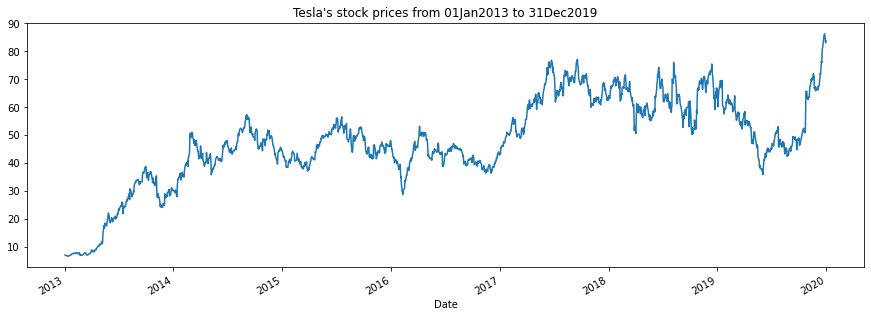

In [4]:
#Code for 1.1 to plot the adjusted close field of the dataframe
#--------------------------------------------------------------

plt.figure(figsize=(15,5))

all_data['Adj Close'].plot(title="Tesla's stock prices from 01Jan2013 to 31Dec2019")

plt.show()

In [5]:
# Write your code for 1.2 to print the num of training and test samples
#-----------------------------------------------------------------------

# All data until 2018 are for training and the data from 2019 onwards is for testing - how many training and testing samples are there in the data?

train = all_data[:'2018']
test  = all_data['2019':]
print('Training dataset:', train.shape)
print('Testing dataset:', test.shape)
print('')
print("There are "+ str(all_data[:'2018'].shape[0]) + " observations in the training data")
print("There are "+ str(all_data['2019':].shape[0]) + " observations in the test data")

Training dataset: (1510, 6)
Testing dataset: (252, 6)

There are 1510 observations in the training data
There are 252 observations in the test data


## Generate train/test data

Complete the function ts_train_test which takes in 3 parameters - all_data, time_steps and for_periods

2.1 In the for loops, write the appropriate range and steps for i to iterate through

2.2 Append to X_train, y_train & X_test as follows:

    X_train is to be appended - for each i, look back for time_steps and append the closing price
    y_train - for each i, look ahead for for_periods and append the closing price 
    X_test - same as X_train
    
2.3 Reshape X_train and X_test as follows: shape[0] x shape[1] x 1

### Note: Only add code in places where "insert your code here" is specified. Do not edit code elsewhere

In [6]:
def ts_train_test(all_data,time_steps,for_periods):
    '''
    input: 
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2018/12/31
      X_test:  data from 2019 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    ts_train = all_data[:'2018'].iloc[:,0:1].values
    ts_test  = all_data['2019':].iloc[:,0:1].values 
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    X_train = []
    y_train = []

    
    ############ Fill in the appropriate arguments to the range function for the training data###########
    for i in range(time_steps,ts_train_len-1):
        X_train.append(ts_train[i-time_steps:i,0])
        y_train.append(ts_train[i:i+for_periods,0])
            
            
    X_train, y_train = np.array(X_train), np.array(y_train)

    #Write your code below to reshape X_train for efficient modelling / question 2.3
    #--------------------------------------------------------------------------------        
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
        
    
    inputs = pd.concat((all_data["Adj Close"][:'2018'], all_data["Adj Close"]['2019':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)

    # Insert the code below for 2.2
    #------------------------------
    X_test = []
            
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
            
        
    X_test = np.array(X_test)
            
    #Write your code below to reshape X_test for efficient modelling  
    #---------------------------------------------------------------
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
            
   
    return X_train, y_train , X_test

X_train, y_train, X_test = ts_train_test(all_data,5,2)
X_train.shape[0],X_train.shape[1]

(1504, 5)

In [7]:
# Make the 3-D shape to a data frame so we can see: 
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0],X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see,y_train_see],axis=1)

,0,1,2,3,4,0,1
0,7.000000,7.036000,6.960000,6.960000,6.900000,6.802000,6.774000
1,7.036000,6.960000,6.960000,6.900000,6.802000,6.774000,6.808000
2,6.960000,6.960000,6.900000,6.802000,6.774000,6.808000,6.616000
3,6.960000,6.900000,6.802000,6.774000,6.808000,6.616000,6.622000
4,6.900000,6.802000,6.774000,6.808000,6.616000,6.622000,6.770000
...,...,...,...,...,...,...,...
1499,75.000000,72.400002,70.108002,67.519997,65.410004,63.480000,62.700001
1500,72.400002,70.108002,67.519997,65.410004,63.480000,62.700001,60.000000
1501,70.108002,67.519997,65.410004,63.480000,62.700001,60.000000,63.967999
1502,67.519997,65.410004,63.480000,62.700001,60.000000,63.967999,64.620003


In [8]:
# Make the 3-D shape to a data frame so we can see: 
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0],X_test.shape[1])))
pd.DataFrame(X_test_see)

,0,1,2,3,4
0,59.077999,65.218002,63.226002,66.774002,66.559998
1,65.218002,63.226002,66.774002,66.559998,62.023998
2,63.226002,66.774002,66.559998,62.023998,60.071999
3,66.774002,66.559998,62.023998,60.071999,63.537998
4,66.559998,62.023998,60.071999,63.537998,66.991997
...,...,...,...,...,...
245,71.678001,76.300003,75.797997,78.629997,80.807999
246,76.300003,75.797997,78.629997,80.807999,81.117996
247,75.797997,78.629997,80.807999,81.117996,83.844002
248,78.629997,80.807999,81.117996,83.844002,85.050003


## Simple RNN Model

3.1 Create a Sequential model using Keras

3.2 Add a SimpleRNN layer having 32 units with return_sequences set as True

3.3 Add another hidden layer SimpleRNN with 32 neurons

3.4 Add a Dense output unit with 2 neurons

3.5 Compile the model using rmsprop optimizer and mean_squared_error loss function

3.6 Fit the model on the data using 100 epochs and batch_size of 150

3.7 Predict the model output for X_test

3.8 Plot the actuals and predicted values for X_test

In [9]:
def simple_rnn_model(X_train, y_train, X_test):
    '''
    create single layer rnn model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, SimpleRNN
    
    my_rnn_model = Sequential()

    #3.2 Add a SimpleRNN layer
    #-------------------------
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    
    #3.3 Add  another Simple RNN layer 
    #----------------------------------
    my_rnn_model.add(SimpleRNN(32))
    
    #3.4 Add a Dense output layer having 2 neurons
    #---------------------------------------------
    my_rnn_model.add(Dense(2))
    
    #3.5 Add code for fitting compiling 
    #----------------------------------
    my_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')
    
    #3.6  Add code for fitting the model on the training data
    #--------------------------------------------------------
    my_rnn_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=0)
    
    #3.7 Predict on test set
    #-----------------------
    rnn_predictions = my_rnn_model.predict(X_test)

    # Return the model & predictions
    return my_rnn_model, rnn_predictions

my_rnn_model, rnn_predictions = simple_rnn_model(X_train, y_train, X_test)

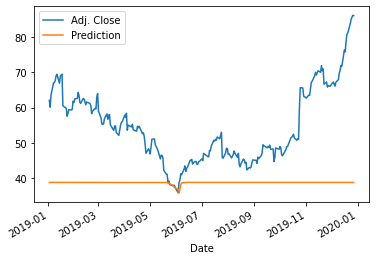

In [10]:
# Complete the function below for 3.8
#------------------------------------
def actual_pred_plot(preds):
    
    actual_pred = pd.DataFrame(columns = ['Adj. Close', 'Prediction'])
    
    actual_pred['Adj. Close'] = all_data.loc['2019':,'Adj Close'][0:len(preds)]
    actual_pred['Prediction'] = preds[:,0]
    

    from keras.metrics import MeanSquaredError
    
    m = MeanSquaredError()
    
    m.update_state(np.array(actual_pred['Adj. Close']),np.array(actual_pred['Prediction']))
        
    return (m.result().numpy(), actual_pred.plot() )

actual_pred_plot(rnn_predictions)
plt.show()

## Normalization



4.1 Use the MinMaxScaler from sklearn and instantiate a scaler having features in the range 0-1

4.2 Fit the scaler on the training data by filling in the missing code below

4.3 Fit, train and predict using the SimpleRNN from above

Note: Remember to do an inverse transform on the predictions prior to returning them

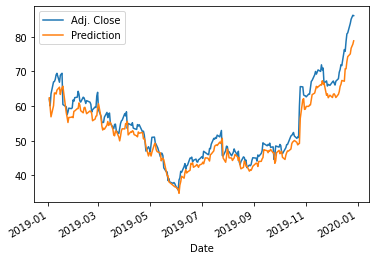

In [11]:
def ts_train_test_normalize(all_data,time_steps,for_periods):
    '''
    input: 
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2018/12/31
      X_test:  data from 2019 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    ts_train = all_data[:'2018'].iloc[:,0:1].values
    ts_test  = all_data['2019':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # scale the data
    from sklearn.preprocessing import MinMaxScaler
    
    # Write your code here below 4.1
    #-------------------------------
    
    sc = MinMaxScaler(feature_range=(0,1))
    ts_train_scaled = sc.fit_transform(ts_train)
    

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
  
    for i in range(time_steps,ts_train_len-1):
        X_train.append(ts_train_scaled[i-time_steps:i,0])
        y_train.append(ts_train_scaled[i:i+for_periods,0])

    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling - Write your code below
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    inputs = pd.concat((all_data["Adj Close"][:'2018'], all_data["Adj Close"]['2019':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)
    
    #Transform the inputs using the MinMaxScaler object by calling its transform method
    inputs = sc.transform(inputs)

    # Preparing X_test
    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1)) 

    return X_train, y_train , X_test, sc

def simple_rnn_model(X_train, y_train, X_test, sc):
    '''
    create single layer rnn model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN
    
    my_rnn_model = Sequential()

    #Add a SimpleRNN layer
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    
    #Add another Simple RNN layer 
    my_rnn_model.add(SimpleRNN(32))
    
    #Add a Dense output layer having 2 neurons
    my_rnn_model.add(Dense(2))
    
    #Write code to compile the model as in the earlier section
    my_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')
    
    #Add code for fitting the model on the training data
    my_rnn_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=0)
    
    #Predict on test set
            
    from sklearn.preprocessing import MinMaxScaler
    rnn_predictions = rnn_predictions = my_rnn_model.predict(X_test)
    rnn_predictions = sc.inverse_transform(rnn_predictions)
    
    #Return the model & predictions

    return my_rnn_model, rnn_predictions

X_train, y_train, X_test, sc = ts_train_test_normalize(all_data,5,2)
my_rnn_model, rnn_predictions_2 = simple_rnn_model(X_train, y_train, X_test, sc)
actual_pred_plot(rnn_predictions_2)
plt.show()

## LSTM Model

5.1 Create a sequential model in keras

5.2 Add a LSTM hidden layer with 50 units and tanh activation function using the appropriate input_shape based on dimensions of X_train

5.3 Add another hidden layer with 50 units and tanh activation function

5.4 Add an output Dense layer with 2 units

5.5 Compile the model with SGD optimizer with learning rate of 0.01, decay of 1e-7, momentum of 0.9 and using mean_squared_error as loss function

5.6 Compile, fit and predit from the model

Note: Remember to apply inverse transform on the predictions prior to returning them

5.7 Plot the actuals and the model predictions using the actual_pred_plot function from earlier

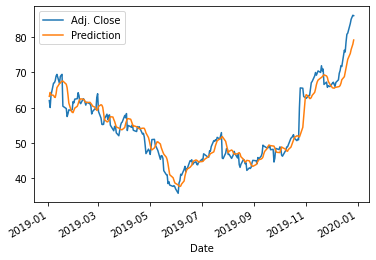

In [12]:
def LSTM_model(X_train, y_train, X_test, sc):
    # create a model
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, SimpleRNN, GRU, LSTM
    from tensorflow.keras.optimizers import SGD
    
    # 5.1 Create a sequential model
    #------------------------------
    my_LSTM_model = Sequential()
    
    # 5.2 Code to a LSTM layer with parameters mentioned above
    #---------------------------------------------------------
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    
    # 5.3 Add another LSTM layer
    #---------------------------
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    
    # 5.4 Add a Dense output layer
    #-----------------------------
    my_LSTM_model.add(Dense(units=2))
    
    # 5.5 Compile the model
    #----------------------
    my_LSTM_model.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    
    # 5.6 Fit the model on training data
    #-----------------------------------
    my_LSTM_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)
    
    # 5.7 Predict 
    #------------
    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)
    
    # Return model & predictions
 
    return my_LSTM_model, LSTM_prediction

my_LSTM_model, LSTM_prediction = LSTM_model(X_train, y_train, X_test, sc)
LSTM_prediction[1:10]
actual_pred_plot(LSTM_prediction)
plt.show()

## Regularization using Dropouts
Add Dropout of 0.2 before the output layer and after the second LSTM hidden layer and compare your results

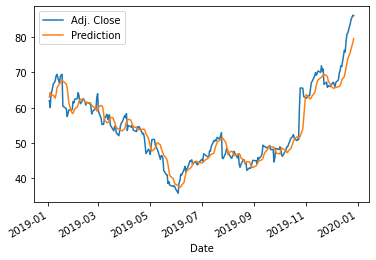

In [13]:
def LSTM_model_regularization(X_train, y_train, X_test, sc):
    # create a model
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, SimpleRNN, GRU, LSTM, Dropout
    from tensorflow.keras.optimizers import SGD
    
    # You may reuse the code from the previous section adding the Dropout feature alone
    
    # 6.1 Create a sequential model
    #------------------------------
    my_LSTM_model = Sequential()
    
    # 6.2 Code to a LSTM layer with parameters mentioned above
    #---------------------------------------------------------
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    
    # 6.3 Add another LSTM layer
    #---------------------------
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    
    # 6.4 Add Dropout of 0.2
    #------------------------
    my_LSTM_model.add(Dropout(0.2))
    
    # 6.5 Add a Dense output layer
    #-----------------------------
    my_LSTM_model.add(Dense(units=2))

    # 6.6 Compile the model
    #----------------------
    my_LSTM_model.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    
    # 6.7 Fit the model on training data
    #-----------------------------------
    my_LSTM_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    # 6.8 Predict 
    #------------
    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)
    
    # Return model & predictions
 
    return my_LSTM_model, LSTM_prediction
    
my_LSTM_model, LSTM_prediction = LSTM_model_regularization(X_train, y_train, X_test, sc)
LSTM_prediction[1:10]
actual_pred_plot(LSTM_prediction)
plt.show()

## GRU - Solving the vanishing gradient problem

7.1 Create a sequential model

7.2 Add a hidden GRU layer with 50 units and tanh activation 

7.3 Add another GRU hidden layer with 50 units and tanh activation

7.4 Add a Dense output layer with 2 neurons

7.5 Compile, fit and predict from the model and plot the actuals vs predictions


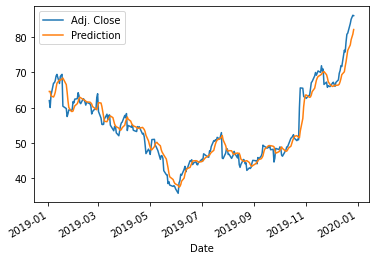

In [14]:
def GRU_model(X_train, y_train, X_test, sc):
    # create a model
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, SimpleRNN, GRU
    from tensorflow.keras.optimizers import SGD
    
    # Create a Sequential model 7.1
    #------------------------------
    my_GRU_model = Sequential()
    
    
    # Add a GRU layer passing in the training data in the appropriate shape 7.2
    #--------------------------------------------------------------------------
    my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    
    # Add another GRU layer 7.3
    #--------------------------
    my_GRU_model.add(GRU(units=50, activation='tanh'))
    
    # Add a dense output layer 7.4
    #------------------------------
    my_GRU_model.add(Dense(units=2))
    
    # Compile the model 7.5 
    #-----------------------
    my_GRU_model.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    
    # Fit the model to training data 7.5
    #-----------------------------------
    my_GRU_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)
    
    # Predict from the model 7.5
    #---------------------------
    GRU_prediction = my_GRU_model.predict(X_test)
    
    # Apply the inverse transform on the predictions 7.5
    #---------------------------------------------------
    GRU_prediction = sc.inverse_transform(GRU_prediction)
    
    # return the model and the predictions 7.5
    #-----------------------------------------
    return my_GRU_model, GRU_prediction

my_GRU_model, GRU_prediction = GRU_model(X_train, y_train, X_test, sc)
actual_pred_plot(GRU_prediction)
plt.show()

#### GRU model with Regularization
Add a Dropout of 0.2 for both the GRU layers - you may reuse the code from the previous section below

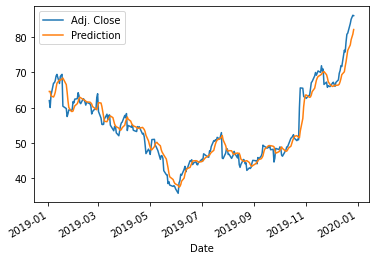

In [15]:
def GRU_model_regularization(X_train, y_train, X_test, sc):
    '''
    create GRU model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, SimpleRNN, GRU
    from tensorflow.keras.optimizers import SGD
    from tensorflow.keras.layers import Dropout
        
 # You may reuse the code from the previous section adding the Dropout feature alone

    # Create a Sequential model 8.1
    #------------------------------
    my_GRU_model = Sequential()
    
    # Add a GRU layer passing in the training data in the appropriate shape 8.2
    #--------------------------------------------------------------------------
    my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
        
    # Add Dropout of 0.2 8.3
    #-----------------------
    my_GRU_model.add(Dropout(0.2))
    
    # Add another GRU layer 8.4
    #--------------------------
    my_GRU_model.add(GRU(units=50, activation='tanh'))
    
    # Add Dropout of 0.2  8.5
    #-------------------------
    my_GRU_model.add(Dropout(0.2))
    
    # Add a dense output layer 8.6
    #------------------------------
    my_GRU_model.add(Dense(units=2))
    
    # Compile the model 8.7
    #-----------------------
    my_GRU_model.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    
    # Fit the model to training data 8.8
    #-----------------------------------
    my_GRU_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)
    
    # Predict from the model 8.9
    #---------------------------
    GRU_predictions = my_GRU_model.predict(X_test)
    
    # Apply the inverse transform on the predictions 8.10
    #----------------------------------------------------
    GRU_predictions = sc.inverse_transform(GRU_predictions)
    
    # return the model and the predictions 8.11
    #-----------------------------------------
    return my_GRU_model, GRU_predictions
    
my_GRU_model, GRU_predictions = GRU_model_regularization(X_train, y_train, X_test, sc)
GRU_predictions[1:10]
actual_pred_plot(GRU_prediction)
plt.show()